     patient_id  gender   age nationality     province current_state  \
0             1  female  31.0   indonesia  DKI Jakarta      released   
1             2  female  64.0   indonesia  DKI Jakarta      released   
2             3  female  33.0   indonesia  DKI Jakarta      released   
3             4  female  34.0   indonesia  DKI Jakarta      isolated   
4             5    male  55.0   indonesia  DKI Jakarta      isolated   
5             6    male  36.0   indonesia  DKI Jakarta      released   
6             7  female  54.0   indonesia  DKI Jakarta      released   
7             8    male  55.0   indonesia  DKI Jakarta      released   
8             9  female  55.0   indonesia  DKI Jakarta      released   
9            10    male  29.0   foreigner  DKI Jakarta      isolated   
10           11  female  54.0   foreigner  DKI Jakarta      isolated   
11           12    male  31.0   indonesia  DKI Jakarta      isolated   
12           13  female  16.0   indonesia  DKI Jakarta      rele

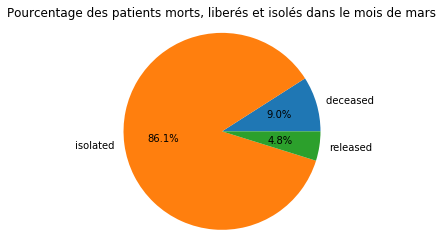

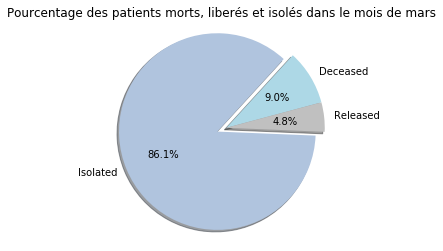

In [5]:
import pandas as pd
import os

# mettre le fichhier csv dans une dataframe pour faciliter la manipulation des donnees
df = pd.read_csv('patient.csv',delimiter=",")

#print(df)
print(df.iloc[:,:])
#print(df.shape)
#print(df.columns) 

for idx,column in enumerate(df.columns):
     print(idx,column)

#df=df.replace(to_replace ='[nN]ew', value = 'New_', regex = True)
#df=df.int.replace(to_replace ='Mar', value = '03', regex = True)
#print(df)       

"""
df_sort=df.sort_values(by='Date')
print(df_sort)    
"""
# netoyage des donnees
"""
df = df.drop(['patient_id', 'nationality'], axis=1) 
df

"""
"""
#la frequence d'age 
dfa=df.iloc[:,[2]]
dfa.plot(kind='hist')
dfa.max()
dfa.min()
"""
"""
mond_data= df.groupby('province')['age'].mean()
print(mond_data)
"""

# group by province, get mean, min, and max value of Age for each value of province.
grouped_single = df.groupby('province').agg({'age': ['mean', 'min', 'max','median','var','std']})

print(grouped_single)

# rename columns
grouped_single.columns = ['Age_mean', 'Age_min', 'Age_max','Median','Variance','Ecart-type']

# reset index to get grouped columns back
grouped_single2 = grouped_single.reset_index()

print(grouped_single2)

"""
grouped_single2.plot()
df.groupby('age').count().plot()
df.groupby('age').count().plot(kind='bar')
#grouped_single.hist(by='age_mean')
grouped_single.hist()
"""
grouped_gender = df.groupby('gender').agg({'age': ['mean', 'min', 'max','median','var','std']})

print(grouped_gender)

# rename columns
grouped_gender.columns = ['Age_mean', 'Age_min', 'Age_max','Median','Variance','Ecart-type']


# reset index to get grouped columns back
grouped_gender2 = grouped_gender.reset_index()

print(grouped_gender2)

print(grouped_gender2.corr())

"""
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = grouped_single2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


grouped_single2.corr()
plt.matshow(grouped_gender2.corr())
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(grouped_gender2.corr(), fignum=f.number)
plt.xticks(range(grouped_gender2.shape[1]), grouped_gender2.columns, fontsize=14, rotation=45)
plt.yticks(range(grouped_gender2.shape[1]), grouped_gender2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

"""
#print(grouped_gender2['Variance'].corr(grouped_gender2['Ecart-type']))

"""
grouped_df = df.groupby(["confirmed_date"])

for key,item in grouped_df:
    a_group = grouped_df.get_group(key)
    print(a_group, "\n")
"""   

    
#print(df.groupby(['confirmed_date']).count())
#df.set_index(["confirmed_date", "age"]).count(level="confirmed_date")

# Get a bool series representing which row satisfies the condition i.e. True for
# row in which value of 'Age' column is more than 30
seriesObj = df.apply(lambda x: True if x['age'] > 85 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of patients in dataframe in which Age > 85 : ', numOfRows)

"""
# row in which value of 'Age' column is less than 19
seriesObj = df.apply(lambda x: True if x['age'] < 19 else False , axis=1)
# Count number of True in series
numOfRows = len(seriesObj[seriesObj == True].index)
print('Nombre des patients affectés par le Covid-19 qui ont age < 19 : ', numOfRows)

# row in which value of 'Age' column is between 19 et 65
seriesObje = df.apply(lambda y: True if 19 < y['age'] < 65 else False , axis=1)
# Count number of True in series
numbOfRows = len(seriesObje[seriesObje == True].index)
print('Nombre des patients affectés par le Covid-19 qui ont age entre 19 et 65 : ', numbOfRows)

# row in which value of 'Age' column is more than 65
seriesObjt = df.apply(lambda z: True if z['age'] > 65 else False , axis=1)
# Count number of True in series
numbrOfRows = len(seriesObjt[seriesObjt == True].index)
print('Nombre des patients affectés par le Covid-19 qui ont age > 65 : ', numbrOfRows)

"""



seriesObject = df.apply(lambda x: True if x['current_state'] == 'deceased' else False , axis=1)
# Count number of True in series
nbr_mort = len(seriesObject[seriesObject == True].index)
print('Number of patients in dataframe in which currentstate=mort : ', nbr_mort)

"""
# Count number of rows in a dataframe that contains value 11 in any column
seriesObj = empDfObj.apply(lambda x: True if 11 in list(x) else False, axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe which contain 11 in any column : ', numOfRows)
"""




# pourcentage des femmes et hommes pichart 
sex = df.pivot_table(index = ['gender'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(sex)

"""
my_labels = 'Femme ','Homme'
my_colors = ['lightblue','silver']
my_explode = (0, 0.05)
import matplotlib.pyplot as plt
plt.pie(dups,labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Pourcentage des patients (hommes et femmes) affectés par le Covid-19 dans au mois de mars')
plt.axis('equal')
plt.show()

my_labels = 'deceased ','isolated'
import matplotlib.pyplot as plt
plt.pie(dups,labels=my_labels,autopct='%1.1f%%')
plt.title('Pourcentage des patients morts, liberés et isolés dans le mois de mars')
plt.axis('equal')
plt.show()
"""



# nombre de patients affecte par le covid par jours bar graph 
dups = df.pivot_table(index = ['confirmed_date'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(dups)
dups2=dups.sort_values(na_position='last')
print(dups2)





#  nombre de patients released isolated desease  au mois de mars pichart
state = df.pivot_table(index = ['current_state'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(state) 

# la moyenne d'age de released isolated desease au mois de mars  pichart
import numpy as np
state_age=df.pivot_table(index='current_state', aggfunc={'age': np.mean})
print(state_age)

#released isolated desease nombre par jour pichart
nbr_mor = df.pivot_table(index = ['confirmed_date','current_state'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbr_mor) 

#nombre de contamination jours
nbr_cont = df.pivot_table(index = ['confirmed_date','contacted_with'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbr_cont) 


# nbr mort isole releas par  province pichart 
nbr_pro = df.pivot_table(index = ['province','current_state'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbr_pro) 


# counting the duplicates 
nbrmor_hop = df.pivot_table(index = ['hospital','gender'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbrmor_hop)

# nbr homme femme par  province pichart 
nbr_hf = df.pivot_table(index = ['province','gender'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbr_hf) 

"""
import numpy as np
dataFrame_vide = pd.DataFrame()
state_age=df.pivot_table(index='current_state', aggfunc={'age': np.mean})
state_age=state_age.T
dataFrame_vide = pd.concat([dataFrame_vide, state_age], axis=0)
#print(dataFrame_vide)
dataFrame_vide = dataFrame_vide.reset_index(drop=True)
print(dataFrame_vide)
"""


#dups2.plot(kind='bar')
#nbr_mor.plot(kind='bar')



my_labels = 'deceased ','isolated','released'
import matplotlib.pyplot as plt
plt.pie(state,labels=my_labels,autopct='%1.1f%%')
plt.title('Pourcentage des patients morts, liberés et isolés dans le mois de mars')
plt.axis('equal')
plt.show()



my_labels = 'Deceased ','Isolated','Released'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
import matplotlib.pyplot as plt
plt.pie(state,labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Pourcentage des patients morts, liberés et isolés dans le mois de mars')
plt.axis('equal')
plt.show()





province          gender
Bali              female     1
Banten            female     1
                  male       5
DI Yogyakarta     male       1
DKI Jakarta       female    57
                  male      67
Jawa Barat        female     4
                  male       5
Jawa Tengah       female     1
                  male       3
Jawa Timur        female     1
                  male       6
Kalimantan Barat  male       2
Kepulauan Riau    male       1
Sulawesi Utara    male       1
dtype: int64


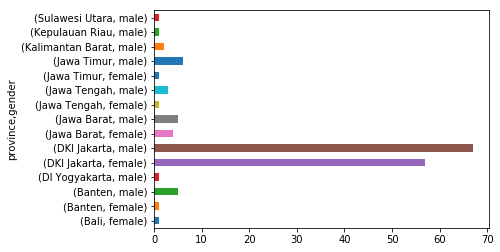

In [4]:

  
# nbr homme femme par  province pichart 
nbr_hf = df.pivot_table(index = ['province','gender'], aggfunc ='size') 
  
# displaying the duplicate Series 
print(nbr_hf) 
nbr_hf.plot( kind = 'barh')
#nbr_pro.plot( kind = 'bar')
#nbr_hf.hist(by='province')
#plt.plot(nbr_hf.index)
#nbr_hf.plot(kind = 'bar', color='r',figsize=(6, 6))

